# EDA (Exploratory Data Analysis)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

diamonds.head()

carat        cut color clarity  depth  table  price     x     y         z  \
0   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.311270   
1   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.310140   
2   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.630160   
3   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.750385   
4   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.480600   

   clarity_num  color_num  cut_num  carat_log  price_log  
0          1.0        5.0      4.0  -1.560648   5.786897  
1          3.0        5.0      2.0  -1.469676   5.789960  
2          4.0        1.0      4.0  -1.237874   5.811141  
3          2.0        0.0      2.0  -1.171183   5.814131  
4          6.0        0.0      3.0  -1.427116   5.817111

#### Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

#### Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color.

In [10]:
diamonds.describe()

carat         depth         table         price             x  \
count  48933.000000  48933.000000  48933.000000  48933.000000  48933.000000   
mean       0.797748     61.751904     57.451041   3933.641592      5.731532   
std        0.474093      1.429933      2.232986   3988.524750      1.119905   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.690000   
75%        1.040000     62.500000     59.000000   5331.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z   clarity_num     color_num       cut_num  \
count  48933.000000  48933.000000  48933.000000  48933.000000  48933.000000   
mean       5.733300      3.539441      3.085382      3.407251      3.906484   
std        1.111999      0.691357      1.768985      1.699909      1.116507   
min        3.217394      2.239050      0.000000      0.000000      1.000000   
25%        4.720000      2.910060      1.000000      2.000000      3.000000   
50%        5.710000      3.522600      3.000000      3.000000      4.000000   
75%        6.540000      4.036780      4.000000      5.000000      5.000000   
max       10.540000      6.969200      7.000000      6.000000      5.000000   

          carat_log     price_log  
count  48933.000000  48933.000000  
mean      -0.395298      7.787045  
std        0.584914      1.014571  
min       -1.609438      5.786897  
25%       -0.916291      6.855409  
50%       -0.356675      7.783641  
75%        0.039221      8.581294  
max        1.611436      9.842835

In [1]:
# the variability of prices seems to be very high if compared to the size of the average, for example
# (they are almost equal)

#### Let's proceed to check each feature separately.

In [11]:
corr = diamonds.corr()
corr

carat     depth     table     price         x         y  \
carat        1.000000  0.027063  0.181726  0.922207  0.977852  0.976777   
depth        0.027063  1.000000 -0.296986 -0.012077 -0.025812 -0.028677   
table        0.181726 -0.296986  1.000000  0.127854  0.196061  0.190064   
price        0.922207 -0.012077  0.127854  1.000000  0.887904  0.889366   
x            0.977852 -0.025812  0.196061  0.887904  1.000000  0.998525   
y            0.976777 -0.028677  0.190064  0.889366  0.998525  1.000000   
z            0.976969  0.097178  0.155885  0.883208  0.991807  0.991454   
clarity_num -0.282737 -0.068374 -0.138466 -0.106413 -0.303466 -0.299086   
color_num   -0.292033 -0.046311 -0.027518 -0.173196 -0.271145 -0.270996   
cut_num     -0.136266 -0.220212 -0.431637 -0.055211 -0.127663 -0.127300   
carat_log    0.956462  0.030094  0.191571  0.856177  0.992844  0.992358   
price_log    0.920369  0.000406  0.158135  0.896055  0.960838  0.961530   

                    z  clarity_num  color_num   cut_num  carat_log  price_log  
carat        0.976969    -0.282737  -0.292033 -0.136266   0.956462   0.920369  
depth        0.097178    -0.068374  -0.046311 -0.220212   0.030094   0.000406  
table        0.155885    -0.138466  -0.027518 -0.431637   0.191571   0.158135  
price        0.883208    -0.106413  -0.173196 -0.055211   0.856177   0.896055  
x            0.991807    -0.303466  -0.271145 -0.127663   0.992844   0.960838  
y            0.991454    -0.299086  -0.270996 -0.127300   0.992358   0.961530  
z            1.000000    -0.308009  -0.275498 -0.153719   0.992322   0.957372  
clarity_num -0.308009     1.000000   0.001519  0.175568  -0.316756  -0.165755  
color_num   -0.275498     0.001519   1.000000  0.020303  -0.260143  -0.155309  
cut_num     -0.153719     0.175568   0.020303  1.000000  -0.152171  -0.089433  
carat_log    0.992322    -0.316756  -0.260143 -0.152171   1.000000   0.966060  
price_log    0.957372    -0.165755  -0.155309 -0.089433   0.966060   1.000000

In [2]:
#my hypothesis at this point is that the carat (weight), because the correction is very close to 1

## 1. The `color` column
First, let's look at the color column.

In [12]:
color_df = diamonds.groupby('color_num').mean()
color_df

carat      depth      table        price         x         y  \
color_num                                                                    
0.0        1.164531  61.888268  57.798701  5342.467323  6.523567  6.523402   
1.0        1.030982  61.853078  57.570239  5121.677848  6.230671  6.230626   
2.0        0.909698  61.833515  57.518740  4475.434748  5.980141  5.975089   
3.0        0.770016  61.757540  57.290170  3989.929995  5.676257  5.678986   
4.0        0.736225  61.701607  57.420425  3722.164490  5.616532  5.620319   
5.0        0.658942  61.660785  57.490585  3091.383020  5.413941  5.418277   
6.0        0.656904  61.707891  57.384868  3162.202468  5.415491  5.419706   

                  z  clarity_num   cut_num  carat_log  price_log  
color_num                                                         
0.0        4.035630     2.773228  3.735039   0.001499   8.150492  
1.0        3.852150     2.910411  3.879935  -0.147857   8.030419  
2.0        3.695397     2.908488  3.881432  -0.271054   7.913793  
3.0        3.506124     3.490034  3.989985  -0.421930   7.788081  
4.0        3.466525     3.195469  3.886140  -0.448322   7.762555  
5.0        3.339078     3.057842  3.896042  -0.558470   7.582696  
6.0        3.342239     2.778860  3.933106  -0.553539   7.615732

In [3]:
# it seems that price and color vary in inverse proportion (the lower the color value, the higher the price)

#### Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

<AxesSubplot:xlabel='color_num'>

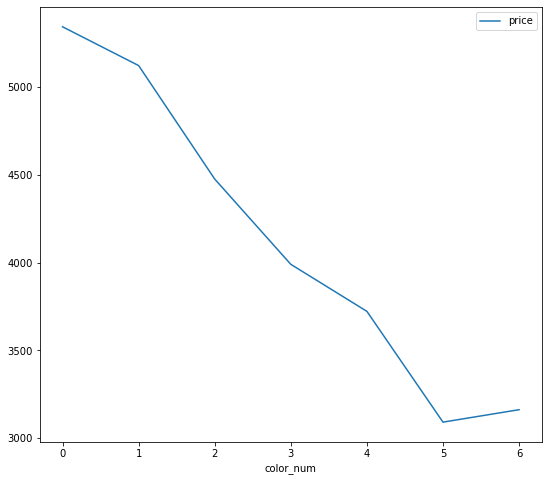

In [13]:
color_df.plot(y="price", figsize=(9, 8))

In [4]:
# for the value 6 seems to have an exception (or it can depend on some other factor), but the rest is proportional

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

In [14]:
carat_df = diamonds.groupby('carat').mean()
carat_df

depth      table         price          x          y         z  \
carat                                                                       
0.20   60.866667  59.333333    364.555556   3.792222   3.758889  2.297569   
0.21   60.511111  58.444444    380.222222   3.874444   3.837778  2.332788   
0.22   60.750000  60.250000    405.000000   3.905000   3.865000  2.360152   
0.23   61.402612  58.026119    486.776119   3.946903   3.974403  2.431336   
0.24   61.600000  57.563559    502.860169   3.989661   4.018263  2.465937   
...          ...        ...           ...        ...        ...       ...   
3.67   62.400000  56.000000  16193.000000   9.860000   9.810000  6.137040   
4.00   63.300000  58.000000  15984.000000  10.010000   9.940000  6.314175   
4.01   61.750000  61.500000  15223.000000  10.080000  10.020000  6.205350   
4.50   65.800000  58.000000  18531.000000  10.230000  10.160000  6.708310   
5.01   65.500000  59.000000  18018.000000  10.740000  10.540000  6.969200   

       clarity_num  color_num   cut_num  carat_log  price_log  
carat                                                          
0.20      3.777778   5.222222  4.222222  -1.609438   5.898493  
0.21      3.444444   5.444444  3.888889  -1.560648   5.939346  
0.22      2.500000   4.750000  4.000000  -1.514128   5.997593  
0.23      5.041045   4.507463  3.276119  -1.469676   6.177271  
0.24      4.970339   4.211864  3.533898  -1.427116   6.206950  
...            ...        ...       ...        ...        ...  
3.67      0.000000   1.000000  4.000000   1.300192   9.692334  
4.00      0.000000   1.000000  3.000000   1.386294   9.679344  
4.01      0.000000   0.500000  4.000000   1.388791   9.630563  
4.50      0.000000   0.000000  1.000000   1.504077   9.827200  
5.01      0.000000   0.000000  1.000000   1.611436   9.799127  

[270 rows x 11 columns]

In [5]:
#seems to have a directly proportional relationship except the end... there is a price reduction there, possible outlier 
#or that has the influence of another factor

<AxesSubplot:ylabel='Frequency'>

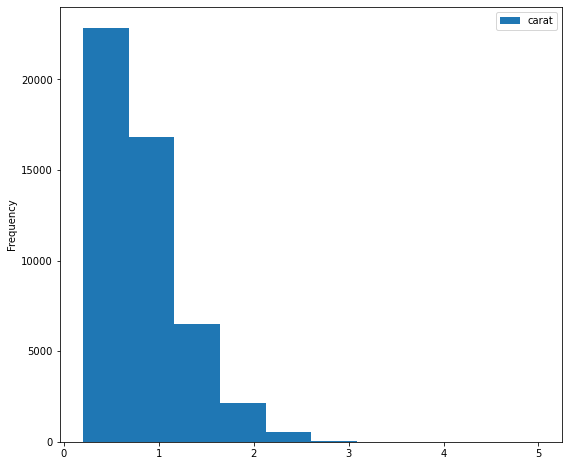

In [15]:
diamonds.plot.hist(y="carat", bins = 10, figsize=(9, 8))

#few diamonds more than 2 carats

# 3. The `table` and `clarity` column
#### First, let's check the `table`.

In [79]:
table_df = diamonds.groupby('table').mean()
table_df

carat  depth    price      x      y         z  clarity_num  color_num  \
table                                                                           
43.0   1.0400  62.90   4997.0  6.450  6.410  4.044470         3.00        1.0   
44.0   0.2900  62.80    474.0  4.200  4.240  2.650160         3.00        5.0   
49.0   0.6500  64.25   2290.5  5.355  5.320  3.426663         2.00        3.0   
50.0   1.0200  61.80   4227.0  6.590  6.510  4.047900         1.00        4.0   
50.1   0.9400  66.00   3353.0  6.130  6.170  4.059000         2.00        2.0   
...       ...    ...      ...    ...    ...       ...          ...        ...   
71.0   0.6800  58.00   1633.0  5.850  5.700  3.349500         1.00        3.0   
73.0   0.6025  68.90   2406.5  5.520  5.465  3.751165         3.75        4.5   
76.0   0.7900  65.30   2362.0  5.520  5.130  3.477225         1.00        3.0   
79.0   0.8100  68.80   2301.0  5.260  5.200  3.598240         2.00        4.0   
95.0   2.0100  58.60  13387.0  8.320  8.310  4.872590         1.00        4.0   

       cut_num  carat_log  price_log  
table                                 
43.0       5.0   0.039221   8.516593  
44.0       3.0  -1.237874   6.161207  
49.0       1.0  -0.601986   7.363722  
50.0       1.0   0.019803   8.349248  
50.1       1.0  -0.061875   8.117611  
...        ...        ...        ...  
71.0       1.0  -0.385662   7.398174  
73.0       1.0  -0.521365   7.782452  
76.0       1.0  -0.235722   7.767264  
79.0       1.0  -0.210721   7.741099  
95.0       1.0   0.698135   9.502039  

[124 rows x 11 columns]

In [16]:
#does not seem to have a direct correlation with price

**Finally, do the same with the `clarity` column.**

In [80]:
clarity_df = diamonds.groupby('clarity_num').mean()
clarity_df

carat      depth      table        price         x         y  \
clarity_num                                                                    
0.0          1.282644  62.761702  58.297720  3931.088146  6.758328  6.706337   
1.0          0.851919  61.855544  57.657598  4006.569726  5.892237  5.891973   
2.0          1.079403  61.772977  57.922676  5079.631021  6.406593  6.396026   
3.0          0.725340  61.668676  57.304766  3822.993824  5.569633  5.576393   
4.0          0.764359  61.729003  57.413755  3926.107165  5.659131  5.660504   
5.0          0.502684  61.634548  56.872711  2518.059036  4.960771  4.975431   
6.0          0.594947  61.666063  57.032449  3273.212082  5.215448  5.228803   
7.0          0.507247  61.501674  56.488159  2874.269684  4.974743  4.996696   

                    z  color_num   cut_num  carat_log  price_log  
clarity_num                                                       
0.0          4.223427   2.969605  2.989362   0.142721   8.027059  
1.0          3.643454   3.450135  3.748394  -0.299599   7.851895  
2.0          3.953047   3.468088  3.667510  -0.043848   8.168717  
3.0          3.436137   3.173469  4.000000  -0.479665   7.723455  
4.0          3.493157   3.489077  3.980221  -0.431951   7.762080  
5.0          3.061782   3.357831  4.231024  -0.816139   7.323999  
6.0          3.219869   3.576483  4.122330  -0.674880   7.528708  
7.0          3.065759   3.088655  4.442033  -0.814178   7.409718

In [46]:
#also does not seem to have a direct correlation with price

#### After looking at your results, 'carat' and 'color' features seems that will affect price the most.

# Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method.

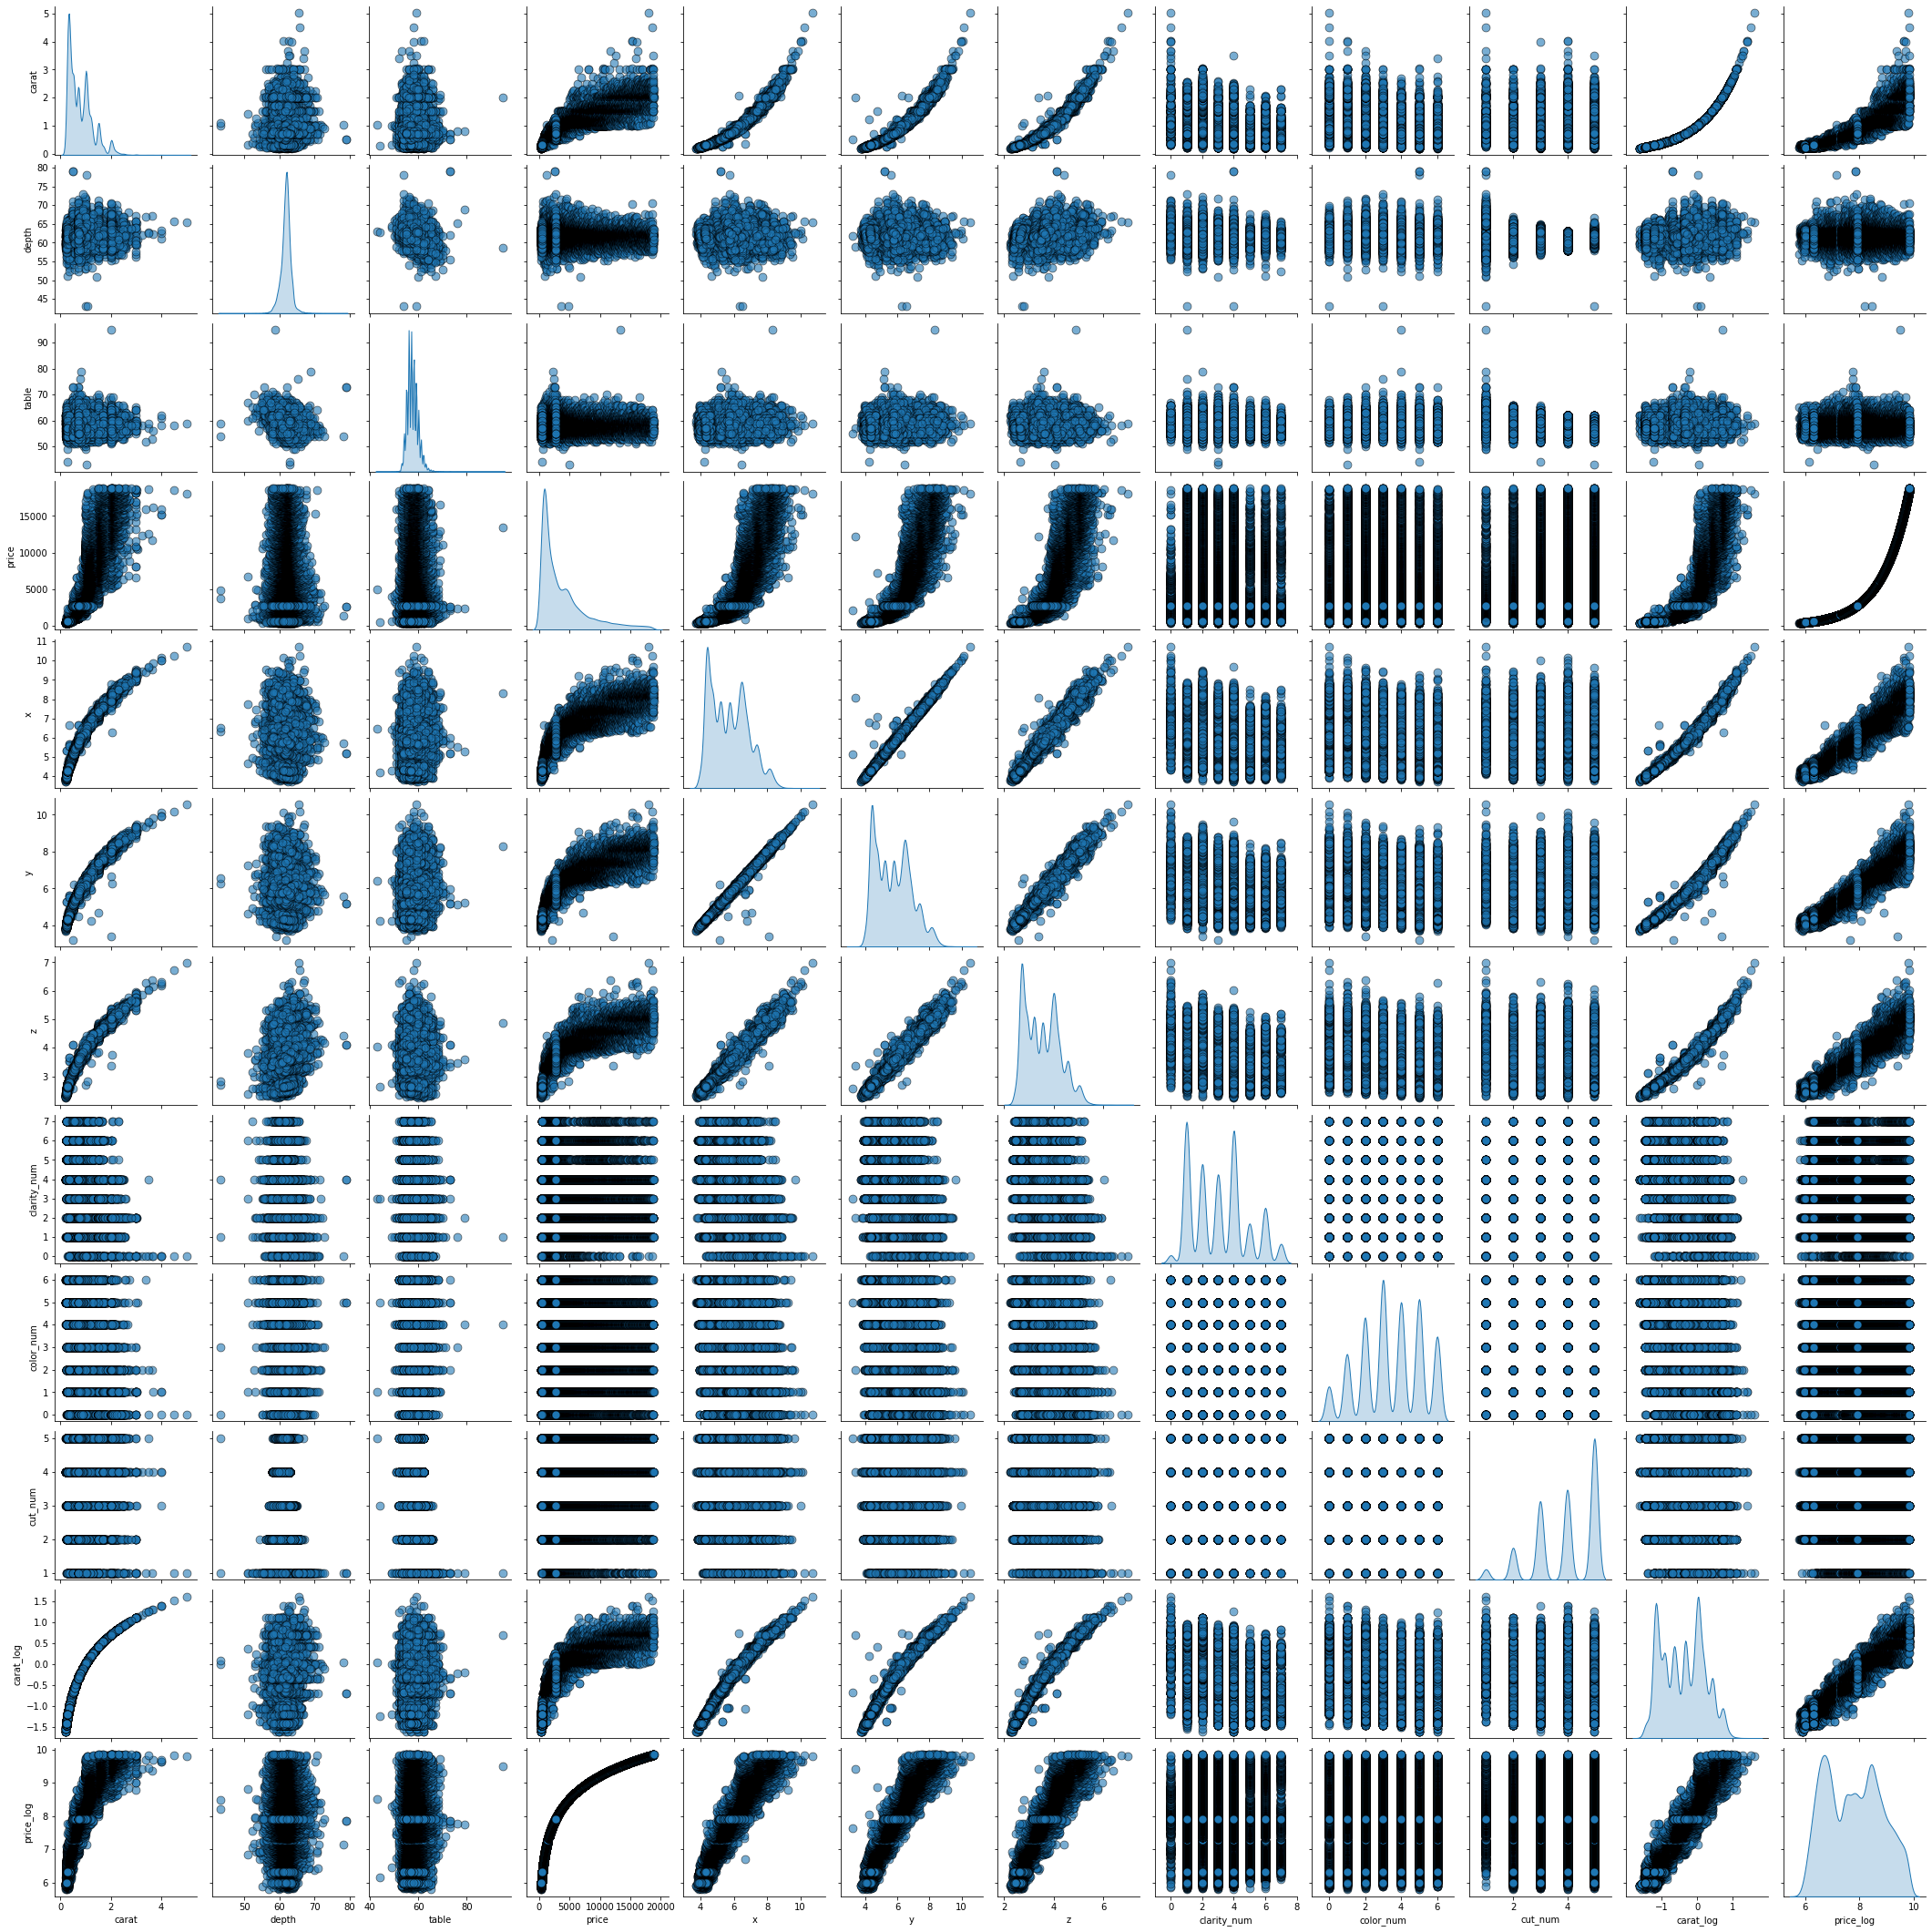

In [81]:
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

#### By looking at the pairplot, carat and price seems to actually have a similar to linear correlation.

#### Now we will see a correlation matrix with a plot.

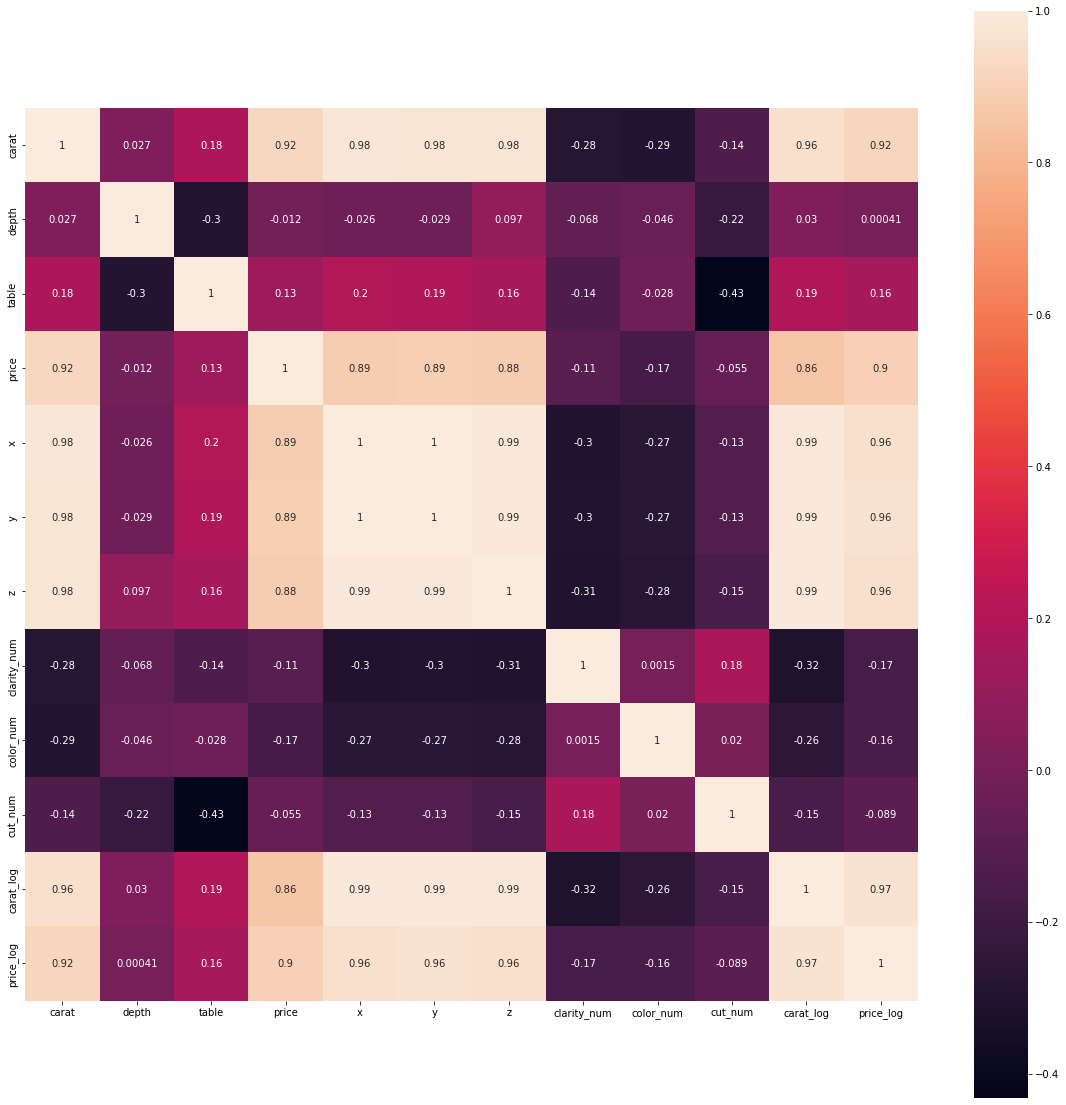

In [84]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

In [51]:
#the dimensions x, y and z have proportional correlation to weight, which makes sense (the bigger the diamond, the heavier)
#consequently the relation between x/y/z and price has high correlation

#### Finally, we calculate the linear regression between the price and the weight.

D:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

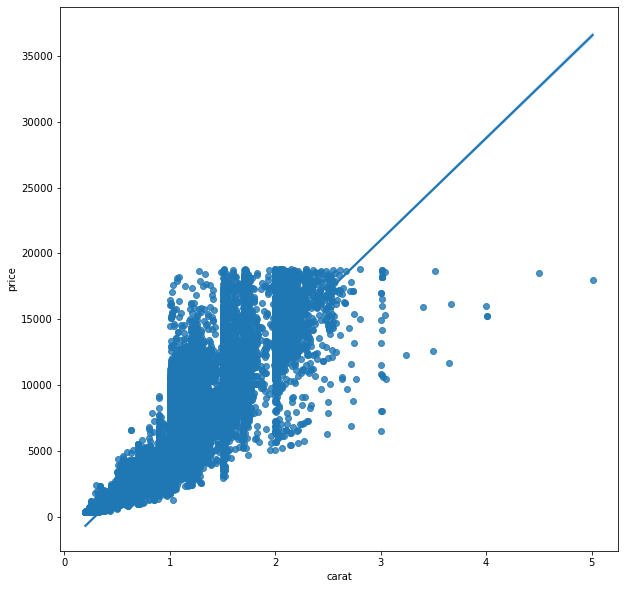

In [17]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [86]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8504653718934189

#### Now let's add a hue (color).

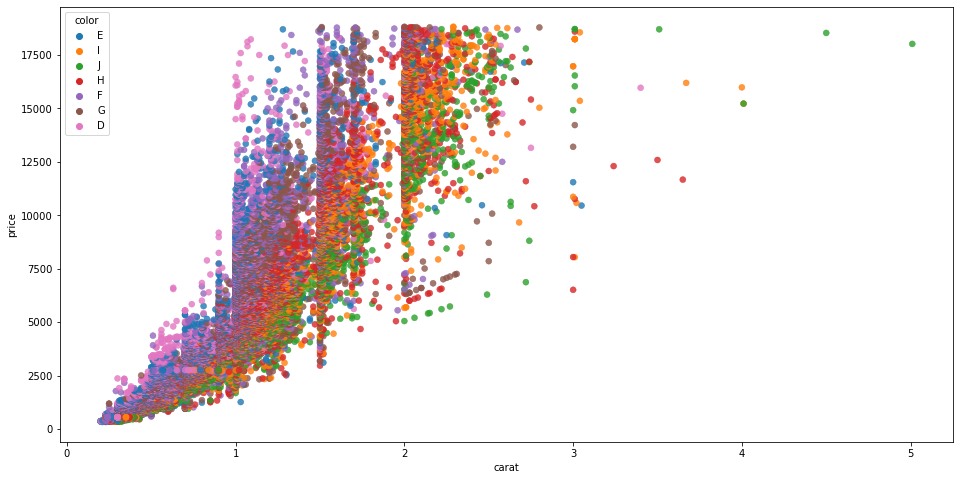

In [87]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=diamonds, x="carat", y="price", hue="color", edgecolor=None, alpha=0.8);

#### Same, but using clarity and cut.


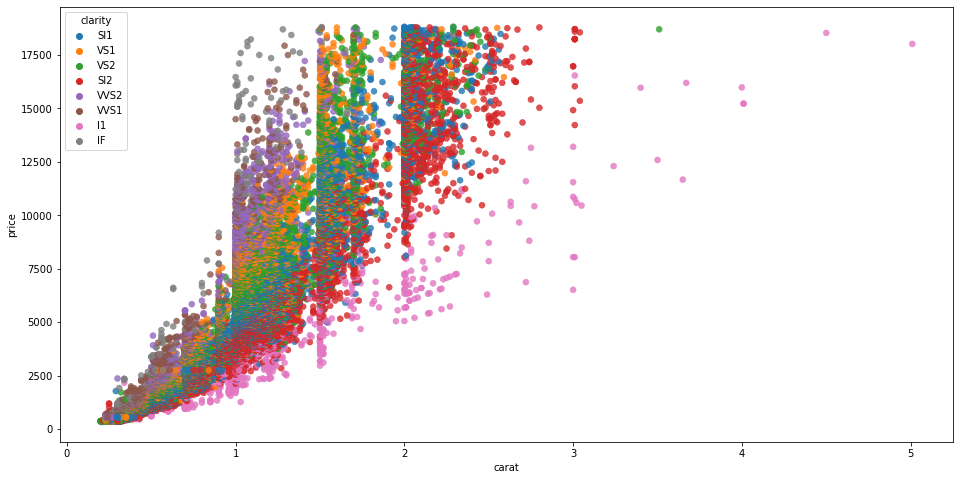

In [88]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=diamonds, x="carat", y="price", hue="clarity", edgecolor=None, alpha=0.8);

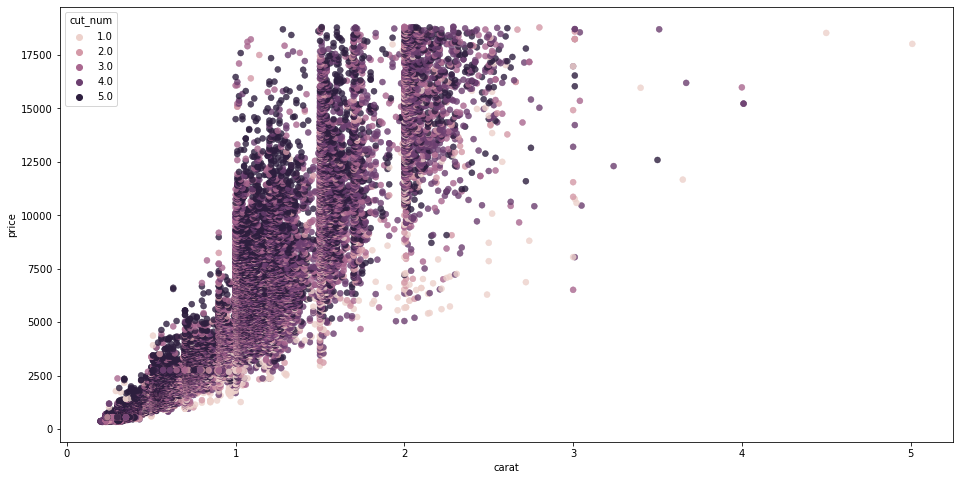

In [89]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=diamonds, x="carat", y="price", hue="cut_num", edgecolor=None, alpha=0.8);

In [ ]:
#clarity, color and cut seem to correlate with the price when associated with the character

#### Let´s test it in logarithmic base, since the relations seems "exponential" and we need to linearize it

In [90]:
diamonds["carat_log"] = np.log(diamonds["carat"])
diamonds["price_log"] = np.log(diamonds["price"])
diamonds

carat        cut color clarity  depth  table  price     x     y  \
0       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
1       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
2       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
3       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
4       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   
48928   0.72    Premium     D     SI1   62.7   59.0   2757  5.69  5.73   
48929   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76   
48930   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75   
48931   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68   
48932   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87   

              z  clarity_num  color_num  cut_num  carat_log  price_log  
0      2.311270          1.0        5.0      4.0  -1.560648   5.786897  
1      2.310140          3.0        5.0      2.0  -1.469676   5.789960  
2      2.630160          4.0        1.0      4.0  -1.237874   5.811141  
3      2.750385          2.0        0.0      2.0  -1.171183   5.814131  
4      2.480600          6.0        0.0      3.0  -1.427116   5.817111  
...         ...          ...        ...      ...        ...        ...  
48928  3.580170          1.0        6.0      4.0  -0.328504   7.921898  
48929  3.499040          1.0        6.0      5.0  -0.328504   7.921898  
48930  3.609320          1.0        6.0      2.0  -0.328504   7.921898  
48931  3.560760          1.0        6.0      3.0  -0.356675   7.921898  
48932  3.638700          2.0        6.0      5.0  -0.287682   7.921898  

[48933 rows x 15 columns]

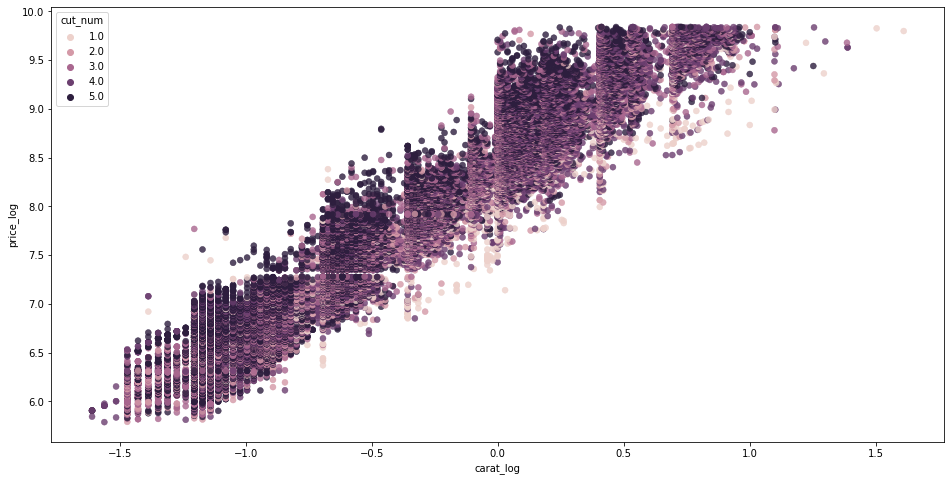

In [91]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=diamonds, x="carat_log", y="price_log", hue="cut_num", edgecolor=None, alpha=0.8);

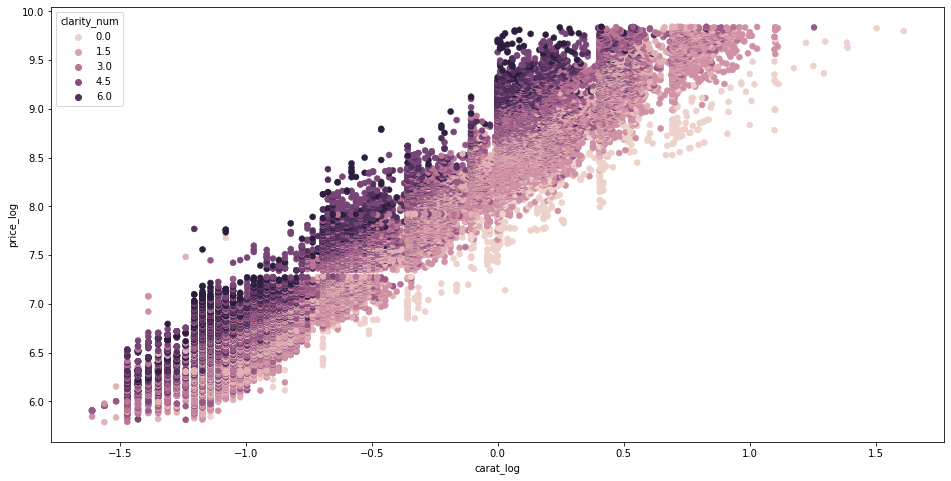

In [92]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=diamonds, x="carat_log", y="price_log", hue="clarity_num", edgecolor=None);

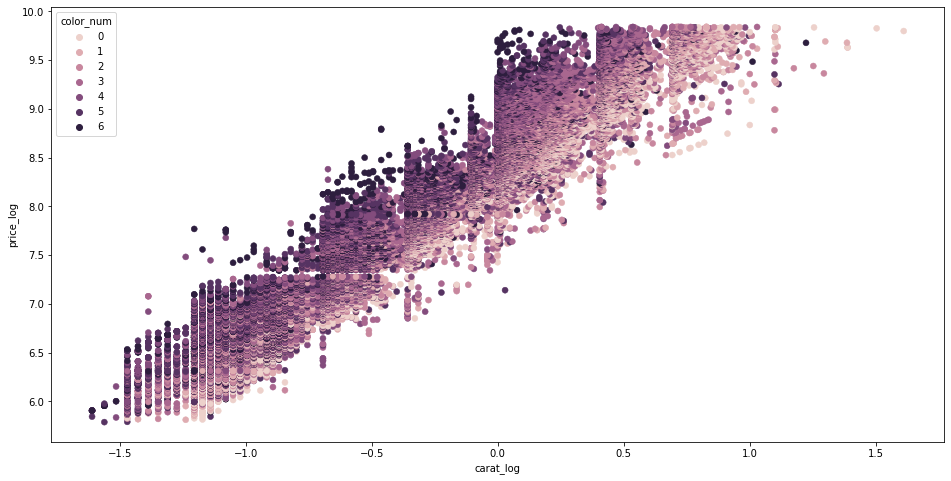

In [93]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=diamonds, x="carat_log", y="price_log", hue="color_num", edgecolor=None);

#### Here we can see that the correlation in a logarithmic basis is very linear. Additionally we can see, specially in the clarity and color hue plots, that the plot is heterogeneous, which means that the variation of price and carat, can have one linear function associated with each specific clarity/color.

#### Let's make a subplots figure showing the behavior of price x carat for each type of cut/clarity/color.

<AxesSubplot:title={'center':'cut 5'}, xlabel='carat_log', ylabel='price_log'>

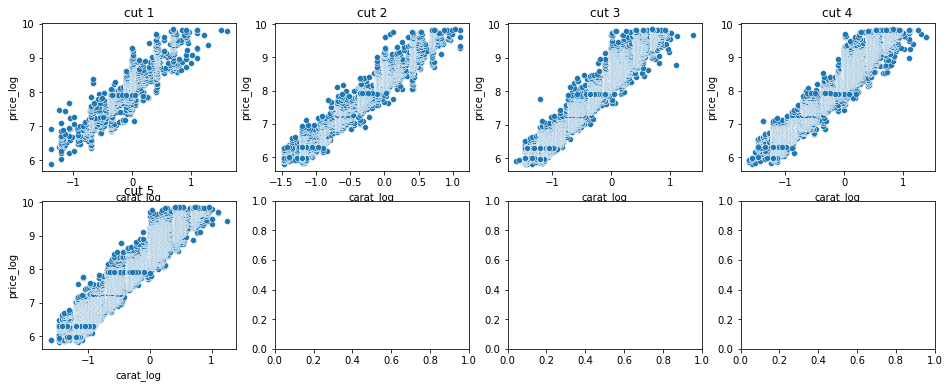

In [122]:
fig, ax = plt.subplots(2, 4, figsize=(16,6))

ax[0,0].set_title('cut 1')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["cut_num"] == 1], ax=ax[0,0])

ax[0,1].set_title('cut 2')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["cut_num"] == 2], ax=ax[0,1])

ax[0,2].set_title('cut 3')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["cut_num"] == 3], ax=ax[0,2])

ax[0,3].set_title('cut 4')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["cut_num"] == 4], ax=ax[0,3])

ax[1,0].set_title('cut 5')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["cut_num"] == 5], ax=ax[1,0])

<AxesSubplot:title={'center':'clarity 7'}, xlabel='carat_log', ylabel='price_log'>

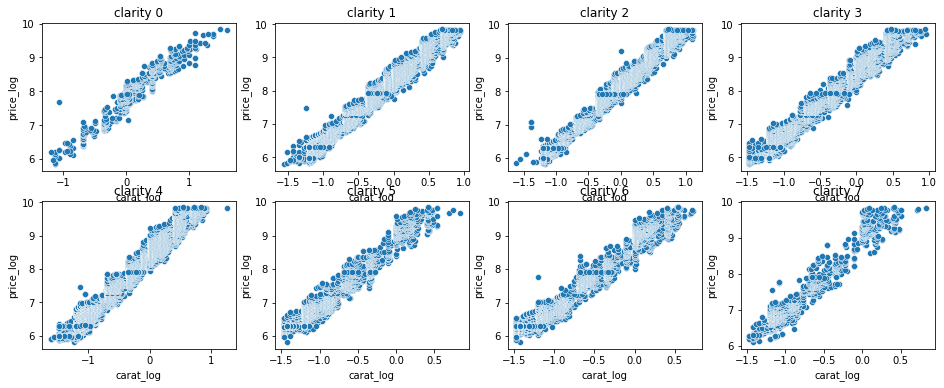

In [123]:
fig, ax = plt.subplots(2, 4, figsize=(16,6))

ax[0,0].set_title('clarity 0')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["clarity_num"] == 0], ax=ax[0,0])

ax[0,1].set_title('clarity 1')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["clarity_num"] == 1], ax=ax[0,1])

ax[0,2].set_title('clarity 2')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["clarity_num"] == 2], ax=ax[0,2])

ax[0,3].set_title('clarity 3')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["clarity_num"] == 3], ax=ax[0,3])

ax[1,0].set_title('clarity 4')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["clarity_num"] == 4], ax=ax[1,0])

ax[1,1].set_title('clarity 5')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["clarity_num"] == 5], ax=ax[1,1])

ax[1,2].set_title('clarity 6')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["clarity_num"] == 6], ax=ax[1,2])

ax[1,3].set_title('clarity 7')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["clarity_num"] == 7], ax=ax[1,3])

<AxesSubplot:title={'center':'color 6'}, xlabel='carat_log', ylabel='price_log'>

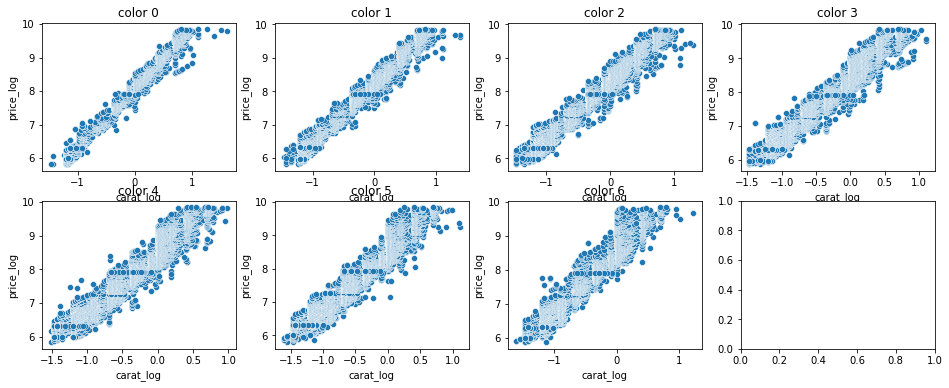

In [124]:
fig, ax = plt.subplots(2, 4, figsize=(16,6))

ax[0,0].set_title('color 0')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["color_num"] == 0], ax=ax[0,0])

ax[0,1].set_title('color 1')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["color_num"] == 1], ax=ax[0,1])

ax[0,2].set_title('color 2')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["color_num"] == 2], ax=ax[0,2])

ax[0,3].set_title('color 3')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["color_num"] == 3], ax=ax[0,3])

ax[1,0].set_title('color 4')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["color_num"] == 4], ax=ax[1,0])

ax[1,1].set_title('color 5')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["color_num"] == 5], ax=ax[1,1])

ax[1,2].set_title('color 6')
sns.scatterplot(x="carat_log", y="price_log", data=diamonds[diamonds["color_num"] == 6], ax=ax[1,2])

#### As mentioned before, the relationship between the carat/price variables, associated with cut, clarity and color, are closest to a straight line on a 'log' basis. The shades show that within clarity, color and cut, one or more categories may be linearly associated. Also, the heterogeneity of the graph leads one to believe that, in terms of linear correlation (in log basis) clarity>color>cut.

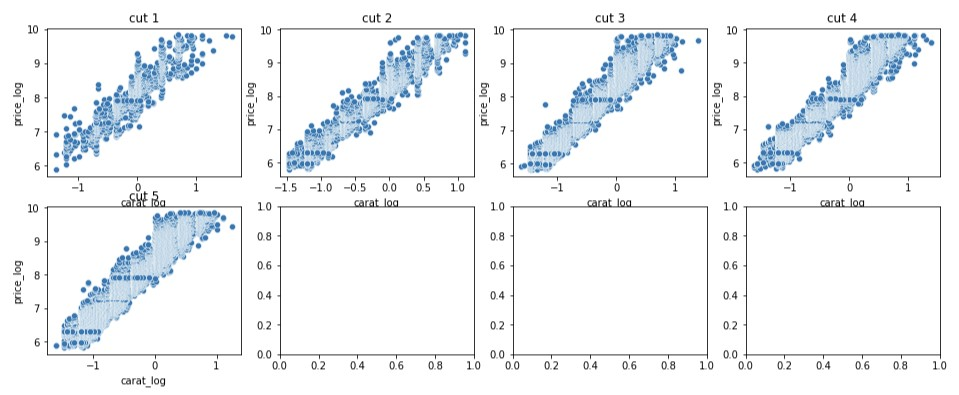

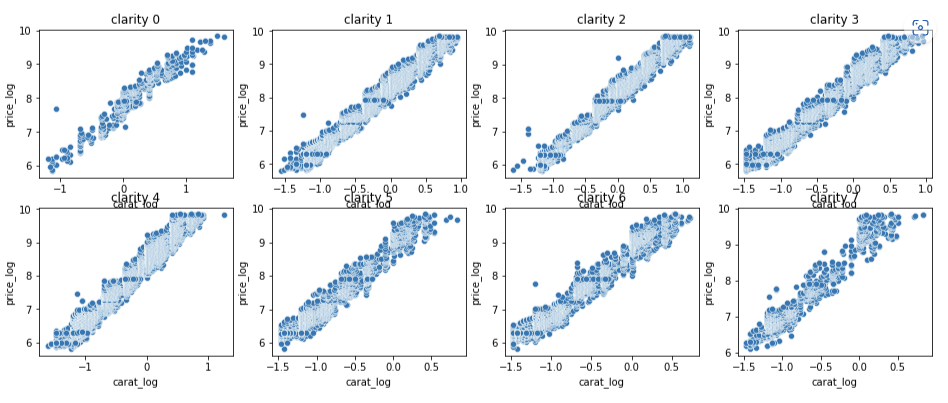

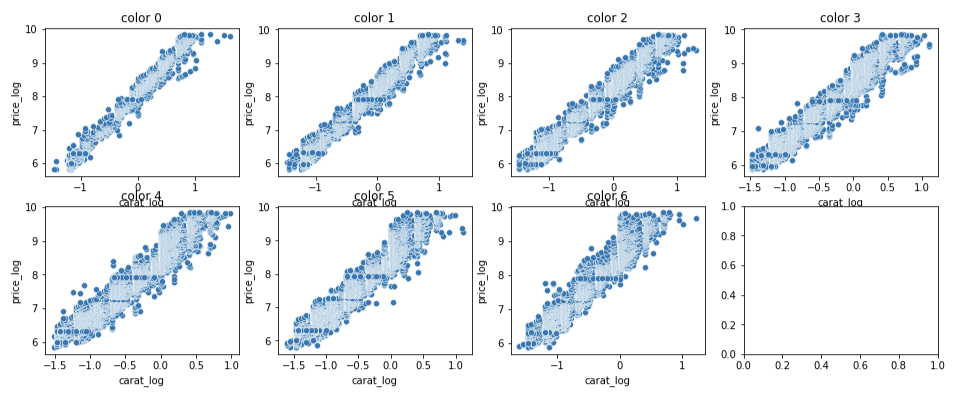

In [27]:
diamonds.to_csv('diamonds_clean.csv')